In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
# import shapely
# from shapely import wkt
sns.set(style='darkgrid')
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [52]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa_gwr.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow_gwr.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan_gwr.csv")

In [53]:
df_warszawa.head()

,buffer_index,operator,center,buffer,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,...,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings,bus_stops
0,2494,inpost,POINT (18.17881 51.85185),"POLYGON ((18.18608963414273 51.85184977535621,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2496,inpost,POINT (14.44149 53.92722),"POLYGON ((14.44912674094946 53.92721975778738,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2498,inpost,POINT (20.95456 52.20284),"POLYGON ((20.96189699400729 52.20283977250097,...",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,48.0,5.0,2.0,1.0,31.0,20.0,1.0
3,2499,inpost,POINT (15.073679 54.09444300000001),"POLYGON ((15.08134649249089 54.09444275629603,...",2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2500,inpost,POINT (18.94084 50.91234),"POLYGON ((18.94797171499726 50.91233978278487,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df_warszawa['center'][0][7:]

'18.17881 51.85185)'

In [55]:
df_warszawa['z'], df_warszawa['y'] = df_warszawa['center'][0].split('(')
df_warszawa['lon'], df_warszawa['lat'] = df_warszawa['y'][0].split(' ')
df_warszawa['xxx'], df_warszawa['yyyy'] = df_warszawa['lat'][0].split(')')

In [56]:
df_warszawa.head()

,buffer_index,operator,center,buffer,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,...,cycleways,parkings,crossings,bus_stops,z,y,lon,lat,xxx,yyyy
0,2494,inpost,POINT (18.17881 51.85185),"POLYGON ((18.18608963414273 51.85184977535621,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,
1,2496,inpost,POINT (14.44149 53.92722),"POLYGON ((14.44912674094946 53.92721975778738,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,
2,2498,inpost,POINT (20.95456 52.20284),"POLYGON ((20.96189699400729 52.20283977250097,...",1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,31.0,20.0,1.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,
3,2499,inpost,POINT (15.073679 54.09444300000001),"POLYGON ((15.08134649249089 54.09444275629603,...",2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,
4,2500,inpost,POINT (18.94084 50.91234),"POLYGON ((18.94797171499726 50.91233978278487,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,


In [3]:
df = pd.concat([df_warszawa, df_krakow, df_poznan])

In [4]:
df.head()

,buffer_index,operator,center,buffer,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,...,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings,bus_stops
0,2494,inpost,POINT (18.17881 51.85185),"POLYGON ((18.18608963414273 51.85184977535621,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2496,inpost,POINT (14.44149 53.92722),"POLYGON ((14.44912674094946 53.92721975778738,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2498,inpost,POINT (20.95456 52.20284),"POLYGON ((20.96189699400729 52.20283977250097,...",1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,48.0,5.0,2.0,1.0,31.0,20.0,1.0
3,2499,inpost,POINT (15.073679 54.09444300000001),"POLYGON ((15.08134649249089 54.09444275629603,...",2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2500,inpost,POINT (18.94084 50.91234),"POLYGON ((18.94797171499726 50.91233978278487,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df.drop(columns = {'operator', 'buffer'})

In [6]:
df.head()

,buffer_index,center,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,TOT,TOT_0_14,...,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings,bus_stops
0,2494,POINT (18.17881 51.85185),0.0,0.0,0.0,0.0,0.0,0.0,156.250000,24.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2496,POINT (14.44149 53.92722),0.0,0.0,0.0,0.0,0.0,0.0,1545.666667,191.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2498,POINT (20.95456 52.20284),1.0,0.0,0.0,0.0,0.0,0.0,8293.750000,1065.00,...,0.0,0.0,3.0,48.0,5.0,2.0,1.0,31.0,20.0,1.0
3,2499,POINT (15.073679 54.09444300000001),2.0,0.0,0.0,0.0,0.0,0.0,220.250000,36.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2500,POINT (18.94084 50.91234),0.0,0.0,0.0,0.0,0.0,0.0,2073.500000,271.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import shapely
from shapely.geometry import Point
import shapely.wkt
df['geometry'] = df.apply(lambda x: shapely.wkt.loads(x['center']), axis=1)

In [15]:
df_geo = gpd.GeoDataFrame(df, geometry = 'geometry', crs = "epsg:4258")

In [10]:
import mgwr

In [11]:
import numpy as np
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [12]:
from mgwr.utils import compare_surfaces, truncate_colormap

c:\users\michal_schudnij\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


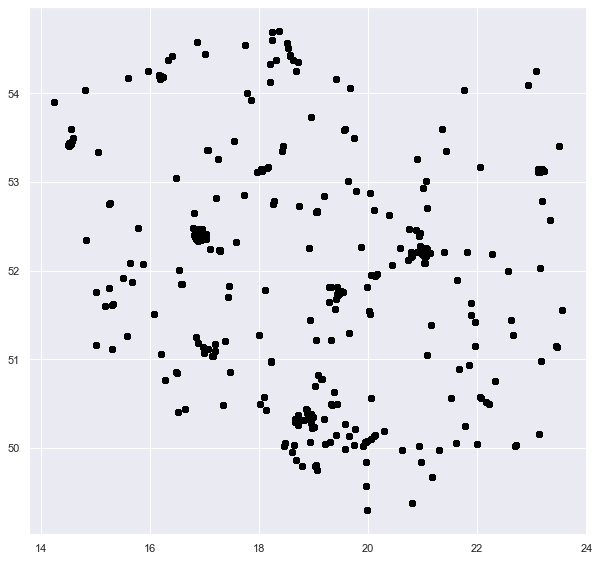

In [23]:
fig, ax = plt.subplots(figsize = (10, 10))
df_geo.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
df_geo.centroid.plot(ax = ax, c = 'black')
plt.savefig('georgia_shp')
plt.show()

In [60]:
import shapely
from shapely.geometry import Point
import shapely.wkt
df_warszawa['geometry'] = df_warszawa.apply(lambda x: shapely.wkt.loads(x['center']), axis=1)

df_geo = gpd.GeoDataFrame(df_warszawa, geometry = 'geometry', crs = "epsg:4258")

In [61]:
df_geo.head()

,buffer_index,operator,center,buffer,poczta_points,dhl_points,ruch_points,dpd_points,ups_points,fedex_points,...,parkings,crossings,bus_stops,z,y,lon,lat,xxx,yyyy,geometry
0,2494,inpost,POINT (18.17881 51.85185),"POLYGON ((18.18608963414273 51.85184977535621,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,,POINT (18.17881 51.85185)
1,2496,inpost,POINT (14.44149 53.92722),"POLYGON ((14.44912674094946 53.92721975778738,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,,POINT (14.44149 53.92722)
2,2498,inpost,POINT (20.95456 52.20284),"POLYGON ((20.96189699400729 52.20283977250097,...",1.0,0.0,0.0,0.0,0.0,0.0,...,31.0,20.0,1.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,,POINT (20.95456 52.20284)
3,2499,inpost,POINT (15.073679 54.09444300000001),"POLYGON ((15.08134649249089 54.09444275629603,...",2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,,POINT (15.07368 54.09444)
4,2500,inpost,POINT (18.94084 50.91234),"POLYGON ((18.94797171499726 50.91233978278487,...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,POINT,18.17881 51.85185),18.17881,51.85185),51.85185,,POINT (18.94084 50.91234)


In [62]:
df_geo['center'][1]

'POINT (14.44149 53.92722)'

In [70]:
df_geo['lon'] = df_geo['lon'].astype(float)

In [71]:
df_geo['xxx'] = df_geo['xxx'].astype(float)

In [88]:
df_geo.columns.to_list()

['buffer_index',
 'operator',
 'center',
 'buffer',
 'poczta_points',
 'dhl_points',
 'ruch_points',
 'dpd_points',
 'ups_points',
 'fedex_points',
 'TOT',
 'TOT_0_14',
 'TOT_15_64',
 'TOT_65__',
 'TOT_MALE',
 'TOT_FEM',
 'MALE_0_14',
 'MALE_15_64',
 'MALE_65__',
 'FEM_0_14',
 'FEM_15_64',
 'FEM_65__',
 'FEM_RATIO',
 'buildings',
 'shops',
 'parks',
 'forests',
 'schools',
 'railways',
 'cycleways',
 'parkings',
 'crossings',
 'bus_stops',
 'z',
 'y',
 'lon',
 'lat',
 'xxx',
 'yyyy',
 'geometry']

In [101]:
g_y = df_geo['FEM_RATIO'].values.reshape((-1, 1))
g_X = df_geo[['buildings', 'TOT_FEM']].values
u = df_geo['lon']
v = df_geo['xxx']
g_coords = list(zip(u, v))

In [102]:
selector = Sel_BW(g_coords, g_y, g_X)

In [103]:
bw = selector.search()

c:\users\michal_schudnij\appdata\local\programs\python\python36-32\lib\site-packages\mgwr\kernels.py:60: RuntimeWarning: invalid value encountered in true_divide
  self.kernel = self._kernel_funcs(self.dvec / self.bandwidth)


LinAlgError: Matrix is singular.

In [78]:
bw = selector.search(search_method = 'interval',
interval = 2,
bw_min = 101,
bw_max = 150)

c:\users\michal_schudnij\appdata\local\programs\python\python36-32\lib\site-packages\mgwr\kernels.py:60: RuntimeWarning: invalid value encountered in true_divide
  self.kernel = self._kernel_funcs(self.dvec / self.bandwidth)


LinAlgError: Matrix is singular.